In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import matplotlib
import sys
from datetime import datetime, timedelta
from time import sleep, time
import numpy as np
import ROOT
from ROOT import TH1D, TCanvas, TNtuple, kBlue, kRed, kBlack, TTree, TFile
from ROOT import addressof
from array import array

In [6]:
df = pd.read_csv("user_data_sep/USER_Orlando_Soto_-_Victor_Quintana_-_TGC-_Charge_Monitoring_System_-_Slot_25/merged_data.csv")
df.columns
print ("TID: {}".format(float(df.iloc[-1]['TID_RAW1']) ))
print ("HEH: {}".format(float(df.iloc[-1]['HEH'])))
print ("N1MeV: {}".format(float(df.iloc[-1]['N1MeV_RAW0'])))

TID: 84.949513872
HEH: 1.99019652804e+11
N1MeV: 1.11684762229e+12


In [7]:
df['Time'] = df['Time'].astype('datetime64[ns]')
df.index = df['Time'] 
df = df.rename(columns={'TID_RAW1':'TID','N1MeV_RAW0':'N1MeV'})

In [11]:
tid = array('d',[0])
heh = array('d',[0])
n1mev = array('d',[0])
tstmp = array('d',[0])

ofile=TFile("beam_data_second_run.root",'recreate')
tr=TTree("tr",'beam data')
tr.Branch("t",tstmp,"t/D") 
tr.Branch("TID",tid,"TID/D")
tr.Branch("HEH",heh,"HEH/D")
tr.Branch("N1MeV",heh,"N1MeV/D")

rows = zip(df['TID'],df['HEH'],df['N1MeV'],df['Time'])

for val in rows:
    tid[0] = val[0]
    heh[0] = val[1]
    n1mev[0] = val[2]
    t = val[3]
    tstmp[0] = (t - datetime(1970, 1, 1)).total_seconds()
    tr.Fill()
ofile.Write()
ofile.Close()

In [4]:
df['HEH_TID'] = df['HEH']/df['TID'] 
df['N1MeV_TID'] = df['N1MeV']/df['TID'] 

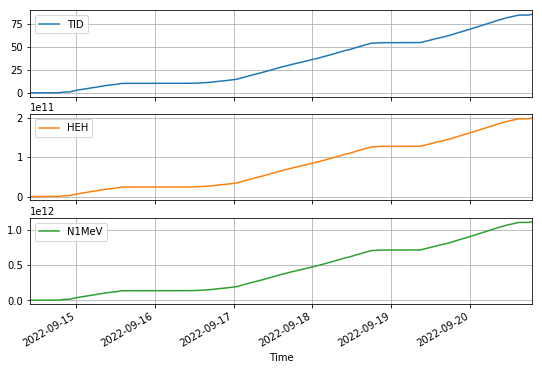

In [5]:
df.loc[:,(df.columns=='TID') | (df.columns=='HEH') | (df.columns=='N1MeV')].plot(grid=True,subplots=True, figsize=(9,6))
#df.loc[:,(df.columns=='HEH_TID') | (df.columns=='N1MeV_TID')].plot(grid=True,subplots=True, figsize=(9,6))

#df['HEH_TID'].plot(grid=True,subplots=True, figsize=(9,6), ylim=(2.3e9,2.5e9))
#df['HEH'].plot(grid=True,subplots=True, figsize=(9,6))
#df['N1MeV'].plot(grid=True,subplots=True, figsize=(9,6))
#df['HEH'].plot(grid=True,x='Time',subplots=True, figsize=(9,6))
#df['N1MeV'].plot(grid=True,x='Time',subplots=True, figsize=(9,6))

plt.savefig('SecondRunAna/beam_all.png', bbox_inches='tight')
#plt.show()

In [13]:
df[('2022-09-17 17:35:06'<df['Time'])&(df['Time']<'2022-09-17 17:35:56')]

,POT,Time,TID,HEH,ThN,N1MeV,HEH_TID,N1MeV_TID
Time,,,,,,,,
2022-09-17 17:35:55.116341760,9.212066e+08,2022-09-17 17:35:55.116341760,30.695117,7.191249e+10,7.691510e+10,4.035546e+11,2.342799e+09,1.314719e+10


<IPython.core.display.Javascript object>


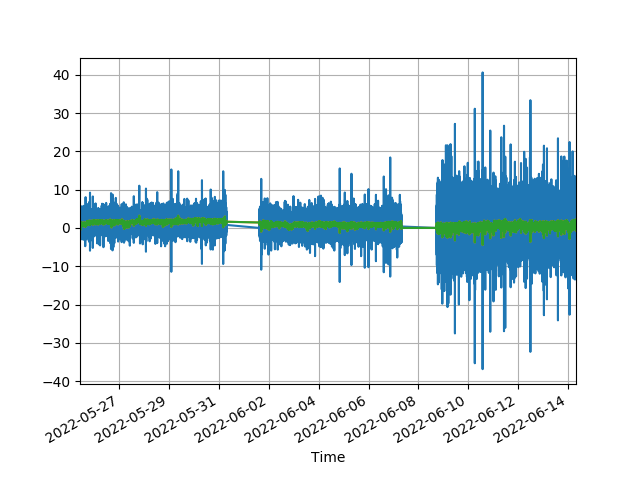

In [6]:
%matplotlib notebook
plt.cla()
df['TID_RAW1_DIFF'] = df['TID_RAW1'].diff()*100
df['TID_RAW1_DIFF_EMA'] = df['TID_RAW1'].diff().ewm(span = 15).mean()*100
df['TID_RAW1_EMA'] = df['TID_RAW1'].ewm(span=15).mean()
df['TID_RAW1_EMA_DIFF'] = df['TID_RAW1_EMA'].diff()*100
#df['TID_RAW1'].plot(grid=True)
df['TID_RAW1_DIFF'].plot(grid=True)
df['TID_RAW1_DIFF_EMA'].plot(grid=True)
df['TID_RAW1_EMA_DIFF'].plot(grid=True)

plt.show()